In [1]:
from keras.models import load_model
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub
import cv2 
import os 
from keras.preprocessing import image
from PIL import Image

In [2]:
new_model = tf.keras.models.load_model('waste_classifier.h5',custom_objects={"KerasLayer":hub.KerasLayer})
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23561152  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 23,567,299
Trainable params: 6,147
Non-trainable params: 23,561,152
_________________________________________________________________


In [3]:
def center(win):
    """
    centers a tkinter window
    :param win: the root or Toplevel window to center
    """
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()


In [4]:
path=""
def execute1():
    global path
    print(e1.get())
    path=e1.get()
    
    top.destroy()

In [5]:
from tkinter import Tk, Button, Entry, Label
top = Tk()   
top.geometry("300x200")
center(top)
top.configure(background="salmon")
name = Label(top, text = "Enter video path").place(x = 30,y = 50)    
#emp_id = Label(top, text = "Enter video path").place(x = 30, y = 90)   
e1 = Entry(top)
e1.place(x = 150, y = 50)


sbmitbtn = Button(top, text = "Start",activebackground = "pink", activeforeground = "blue",command=execute1).place(x = 140, y = 130)
#sbmitbtn.pack()
#close()
top.mainloop()


C:\Users\sovin\Desktop\AWS\Sample Videos\Sample_video1.mp4


In [6]:
import cv2
import os

global path
cam = cv2.VideoCapture(path) 

try: 
	
	# creating a folder named data 
	if not os.path.exists('data'): 
		os.makedirs('data') 

# if not created then raise error 
except OSError: 
	print ('Error: Creating directory of data') 

# frame 
currentframe = 0
count = 0

while(True): 
	
	# reading from frame 
	ret,frame = cam.read()
	cam.set(cv2.CAP_PROP_POS_MSEC,(count*1000))

	if ret: 
		# if video is still left continue creating images 
		name = './data/frame' + str(currentframe) + '.jpg'
		print ('Creating...' + name) 

		# writing the extracted images 
		cv2.imwrite(name, frame) 

		# increasing counter so that it will 
		# show how many frames are created 
		currentframe += 1
		count+=7
	else: 
		break

# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg


In [7]:

class_names=['Dry',"Plastic",'Wet']
pred_list=[]

for  count,filename in enumerate(os.listdir("data")): 
        img_path="C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\data\\"+filename
        img=image.load_img(img_path,target_size=(224,224))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=x/255
        #print('Input img shape:',x.shape)      
        my_img=Image.open(img_path)
        my_img=my_img.resize((150,150))
        #plt.imshow(my_img)
        pred=new_model.predict(x)
        pred_list.append(class_names[np.argmax(pred)])
        #plt.title(f'Material is {class_names[np.argmax(pred)]}')
        

In [8]:
count_w=0
count_d=0
count_p=0

for i in pred_list:
    if(i=="Wet"):
        count_w+=1
    elif(i=="Dry"):
        count_d+=1
    elif(i=="Plastic"):
        count_p+=1
print(count_w,count_d,count_p)

9 2 6


In [9]:
from datetime import date  
    


today = date.today() 
import csv 

# field names 
fields = ['SL. NO.', 'CATEGORY', 'NUMBER OF IMAGES'] 

# data rows of csv file 
rows = [ ['1', 'WET', count_w], 
		['2', 'PLASTIC',  count_p], 
		['3', 'DRY',  count_d]] 

# name of csv file 
filename = str(today)+"_waste.csv"

# writing to csv file 
with open(filename, 'w') as csvfile: 
	# creating a csv writer object 
	csvwriter = csv.writer(csvfile) 
	
	# writing the fields 
	csvwriter.writerow(fields) 
	
	# writing the data rows 
	csvwriter.writerows(rows)

In [10]:
print(pred_list)

['Wet', 'Wet', 'Wet', 'Dry', 'Wet', 'Wet', 'Plastic', 'Plastic', 'Plastic', 'Wet', 'Plastic', 'Wet', 'Plastic', 'Wet', 'Dry', 'Wet', 'Plastic']


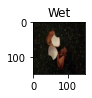

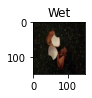

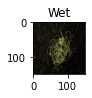

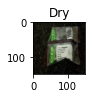

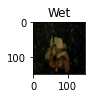

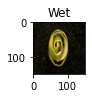

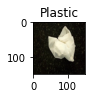

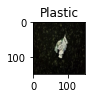

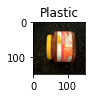

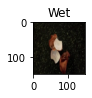

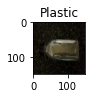

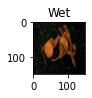

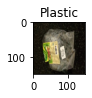

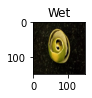

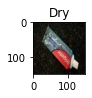

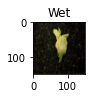

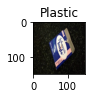

In [11]:
i=0
j=0
class_names=['Dry',"Plastic",'Wet']
for  count,filename in enumerate(os.listdir("data")): 
        img_path="C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\data\\"+filename
        plt.figure(figsize=(10,9))
        plt.subplots_adjust(wspace=0.7,hspace=0.7)
        my_img=Image.open(img_path)
        my_img=my_img.resize((150,150))
        plt.subplot(6,5,j+1)
        plt.imshow(my_img)
        pred=new_model.predict(x)
        plt.title(pred_list[i])            
        i+=1
        j+=1



In [12]:
def message():
    import tkinter as tk
    from tkinter import messagebox
    root= tk.Tk()
    root.withdraw()
    MsgBox = tk.messagebox.showinfo('CSV FILE SENT','The CSV file has been sent to your registered email id!')
    #import sys
    root.destroy()


In [13]:
def email():
    
    from datetime import date
    today=date.today()
    import smtplib
    import mimetypes
    from email.mime.multipart import MIMEMultipart
    from email import encoders
    from email.message import Message
    from email.mime.audio import MIMEAudio
    from email.mime.base import MIMEBase
    from email.mime.image import MIMEImage
    from email.mime.text import MIMEText

    emailfrom = "duocodeltd@gmail.com"
    emailto = email_to
    fileToSend = str(today)+"_waste.csv"
    username = "duocodeltd"
    password = "duocode12"
    

    msg = MIMEMultipart()
    msg["From"] = emailfrom
    msg["To"] = emailto
    msg["Subject"] = "Today's Waste Classification Report"
    #msg.preamble = "help I cannot send an attachment to save my life"
    ctype, encoding = mimetypes.guess_type(fileToSend)
    if ctype is None or encoding is not None:
        ctype = "application/octet-stream"
    maintype, subtype = ctype.split("/", 1)
    if maintype == "text":
        fp = open(fileToSend)
        # Note: we should handle calculating the charset
        attachment = MIMEText(fp.read(), _subtype=subtype)
        fp.close()
    elif maintype == "image":
        fp = open(fileToSend, "rb")
        attachment = MIMEImage(fp.read(), _subtype=subtype)
        fp.close()
    elif maintype == "audio":
        fp = open(fileToSend, "rb")
        attachment = MIMEAudio(fp.read(), _subtype=subtype)
        fp.close()
    else:
        fp = open(fileToSend, "rb")
        attachment = MIMEBase(maintype, subtype)
        attachment.set_payload(fp.read())
        fp.close()
        encoders.encode_base64(attachment)
    attachment.add_header("Content-Disposition", "attachment", filename=fileToSend)
    msg.attach(attachment)
    server = smtplib.SMTP("smtp.gmail.com:587")
    server.starttls()
    server.login(username,password)
    server.sendmail(emailfrom, emailto, msg.as_string())
    server.quit()
    message()

In [14]:
email_to=""

def execute2():
    global email_from,pass_from, email_to
    
    
    email_to=e4.get()
    
    
    top1.destroy()
    email()

In [15]:
from tkinter import Tk, Button, Entry, Label
top1 = Tk()   
top1.geometry("300x200")
#center(top)
top1.configure(background="salmon")
t_em = Label(top1, text = "Enter the Email Address to send the File").place(x = 30,y = 50) 
#emp_id = Label(top, text = "Enter video path").place(x = 30, y = 90)   
e4=Entry(top1)
e4.place(x=30,y=100)


sbmitbtn = Button(top1, text = "Submit",activebackground = "pink", activeforeground = "blue",command=execute2).place(x = 140, y = 130)
#sbmitbtn.pack()
#close()
top1.mainloop()
